In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=r"D:\M.TECH\RP\Project_2nd_sem\archive (2)\DATASET\TRAIN", transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

images, labels = next(iter(dataloader))
print(images.shape) 


torch.Size([32, 3, 224, 224])


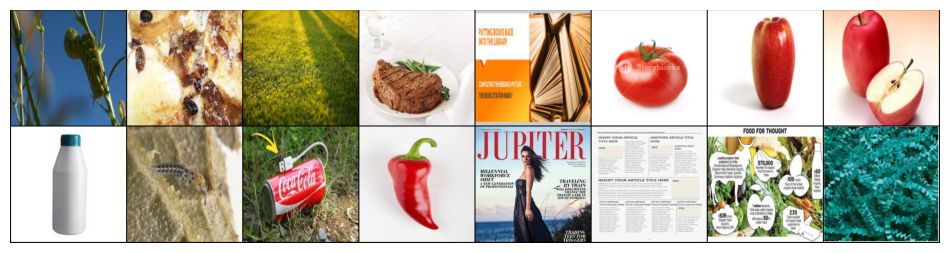

In [4]:
import matplotlib.pyplot as plt
import torchvision.utils

images, labels = next(iter(dataloader))
grid_img = torchvision.utils.make_grid(images[:16], nrow=8, normalize=True)

# Show images
plt.figure(figsize=(12, 6))
plt.imshow(grid_img.permute(1, 2, 0)) 
plt.axis("off")
plt.show()


In [7]:
pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch [1/10], Loss: 0.6958
Epoch [2/10], Loss: 0.5923
Epoch [3/10], Loss: 0.5528
Epoch [4/10], Loss: 0.5115
Epoch [5/10], Loss: 0.4835
Epoch [6/10], Loss: 0.4520
Epoch [7/10], Loss: 0.4266
Epoch [8/10], Loss: 0.4035
Epoch [9/10], Loss: 0.3657
Epoch [10/10], Loss: 0.3449
Training Finished!
Test Accuracy: 71.29%


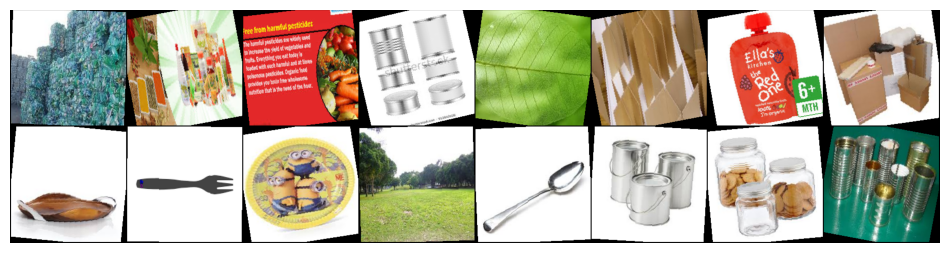

Predicted Class: Recyclable


In [12]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------------
# 1. Define the CNN Model
# -------------------------------
class WasteClassifierCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(WasteClassifierCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 28 * 28, 512)  # Flattened size after convolutions
        self.relu_fc1 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)  # Output layer (3 classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten for FC layer
        x = self.relu_fc1(self.fc1(x))
        x = self.fc2(x)
        return x

# -------------------------------
# 2. Load Dataset & DataLoader
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

# Dataset directories (Change paths accordingly)
train_dir = r"D:\M.TECH\RP\Project_2nd_sem\archive (2)\DATASET\TRAIN"
test_dir = r"D:\M.TECH\RP\Project_2nd_sem\archive (2)\DATASET\TEST"

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# -------------------------------
# 3. Train the Model
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = WasteClassifierCNN(num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  
        outputs = model(images)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training Finished!")

# -------------------------------
# 4. Evaluate Model on Test Data
# -------------------------------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# -------------------------------
# 5. Visualizing Sample Predictions
# -------------------------------
def visualize_batch(dataloader):
    images, labels = next(iter(dataloader))
    grid_img = torchvision.utils.make_grid(images[:16], nrow=8, normalize=True)

    plt.figure(figsize=(12, 6))
    plt.imshow(grid_img.permute(1, 2, 0))  
    plt.axis("off")  
    plt.show()

# Visualize some training images
visualize_batch(train_loader)

# -------------------------------
# 6. Predict on a Single Image
# -------------------------------
def predict_image(image_path, model, transform):
    model.eval()
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)  

    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)

    class_labels = ["Biodegradable", "Recyclable", "Non-Recyclable"]
    return class_labels[predicted_class.item()]

# Example usage
image_path = r"D:\M.TECH\RP\Project_2nd_sem\archive (2)\DATASET\TEST\R\R_10000.jpg"

predicted_class = predict_image(image_path, model, transform)
print(f"Predicted Class: {predicted_class}")
